In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
shoot = pd.read_csv('shootings.csv')

In [3]:
shoot.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


In [20]:
#10 первые 10 городов по стрельбе
shoot['city'].value_counts().head(10)

Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
Chicago         38
Columbus        36
Albuquerque     32
Jacksonville    31
St. Louis       30
Name: city, dtype: int64

In [21]:
#10 штатов по стрельбе
shoot['state'].value_counts().head(10)

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
Name: state, dtype: int64

In [24]:
shoot.arms_category.unique()

array(['Guns', 'Unarmed', 'Other unusual objects', 'Piercing objects',
       'Sharp objects', 'Unknown', 'Blunt instruments', 'Multiple',
       'Electrical devices', 'Hand tools', 'Vehicles', 'Explosives'],
      dtype=object)

In [25]:
shoot['arms_category'].nunique()

12

In [29]:
#coздаем столбуц с именами
shoot['first_name']=shoot['name'].apply(lambda name: name.split(' ')[0])

In [30]:
shoot.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,first_name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,Tim
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,Lewis
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,John
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,Matthew
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,Michael


In [31]:
shoot['first_name'].value_counts()

Michael        142
David           84
Robert          79
James           79
Christopher     71
              ... 
Talif            1
Cleotha          1
Abdul            1
Irecas           1
Caine            1
Name: first_name, Length: 1510, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

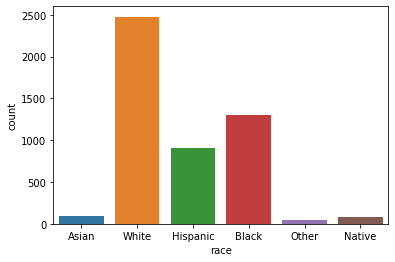

In [35]:
sns.countplot(x='race',data=shoot)

In [38]:
type(shoot['date'].iloc[0])

str

In [39]:
#конвертация из строк в DateTime объект
shoot['date']=pd.to_datetime(shoot['date'])

In [40]:
#на основе date столбца создаем 3 год месяц день
shoot['year']=shoot['date'].apply(lambda time:time.year)
shoot['month']=shoot['date'].apply(lambda time:time.month)
shoot['day']=shoot['date'].apply(lambda time:time.day)

In [41]:
shoot.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,first_name,year,month,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,Tim,2015,1,2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,Lewis,2015,1,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,John,2015,1,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,Matthew,2015,1,4
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,Michael,2015,1,4
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns,Kenneth,2015,1,4
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns,Kenneth,2015,1,5
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns,Brock,2015,1,6
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed,Autumn,2015,1,6
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects,Leslie,2015,1,6


<AxesSubplot:xlabel='month', ylabel='count'>

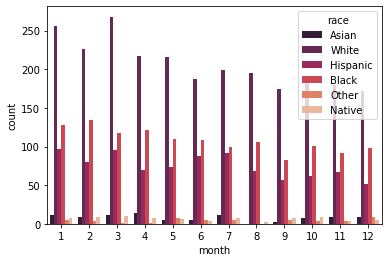

In [43]:
#hueзакрашивает параметры в разные цвета
sns.countplot(x='month',hue='race',data=shoot,palette='rocket')

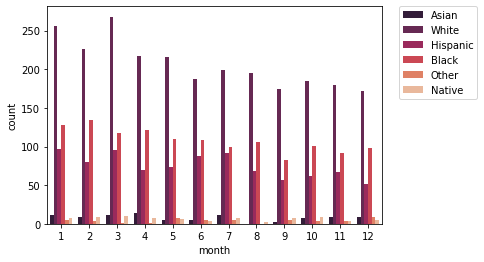

In [44]:
#перемещение легенды
sns.countplot(x='month',hue='race',data=shoot,palette='rocket')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

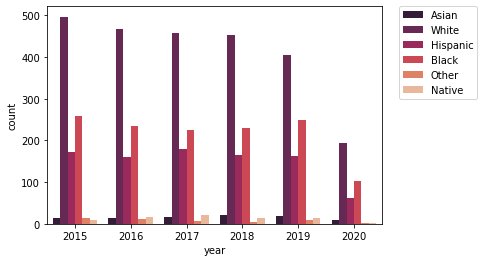

In [45]:
sns.countplot(x='year',hue='race',data=shoot,palette='rocket')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

In [46]:
by_year = shoot.groupby('year').count()
by_year.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,first_name,month,day
year,,,,,,,,,,,,,,,,,,
2015,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965
2016,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904
2017,906,906,906,906,906,906,906,906,906,906,906,906,906,906,906,906,906,906
2018,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888
2019,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858


<AxesSubplot:xlabel='year'>

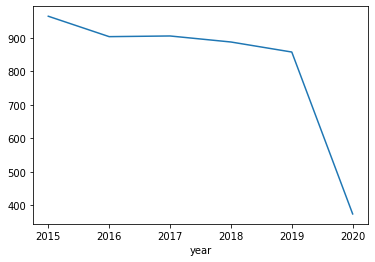

In [47]:
by_year['age'].plot()

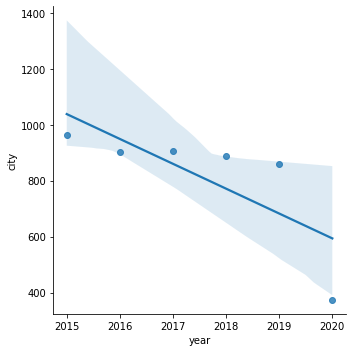

In [49]:
sns.lmplot(x ='year',y='city',data=by_year.reset_index())

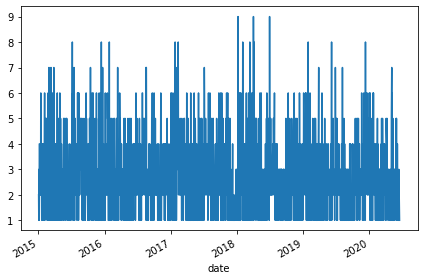

In [51]:
shoot.groupby('date').count()['city'].plot()
plt.tight_layout()

In [52]:
shoot['manner_of_death'].value_counts()

shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

<AxesSubplot:xlabel='date'>

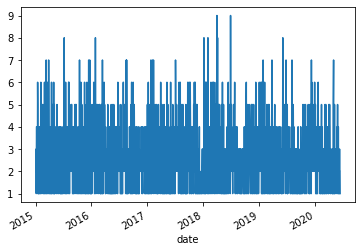

In [56]:
shoot[shoot['manner_of_death']=='shot'].groupby('date').count()['city'].plot()

<AxesSubplot:xlabel='date'>

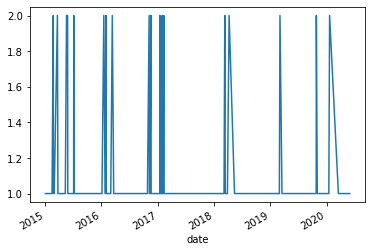

In [57]:
shoot[shoot['manner_of_death']=='shot and Tasered'].groupby('date').count()['city'].plot()